In [1]:
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
file = r'carbon_nanotubes.csv'
df = pd.read_csv(file, delimiter=';', header=None, decimal=',', skiprows=1)
x_train = df.drop([0,1], axis=1).values
print('Shape of data :', x_train.shape)

Shape of data : (10721, 6)


<img src="img/multi.png" width="400">

In [3]:
input_size = 6
hidden_size = 4
coded_size = 3

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
coded = Dense(coded_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(coded)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
encoder = Model(inputs=x, outputs=coded)

### create model to decoder
# retrieve the last layer of the autoencoder model. This the latent vector already IT.
# just have to add a shape IT. 
decoder_input = Input(shape=(coded_size,))
next_input = decoder_input

# the next_input keeps looping getting carried into the next layer as the data vector IT.
for layer in autoencoder.layers[-2:]:
    next_input = layer(next_input)
    
decoder = Model(inputs=decoder_input, outputs=next_input)

# The loop above is the same as this
# decoder_input= Input(shape=(coded_size, ))
# next_input = decoder_input
# next_input = autoencoder.layers[4](next_input)
# next_input = autoencoder.layers[5](next_input)

In [15]:
for i, layer in enumerate(autoencoder.layers):
    print('layer', str(i+1))

layer 1
layer 2
layer 3
layer 4
layer 5


In [24]:
autoencoder.compile(optimizer='adam', loss='mse')

epochs=20
batch_size=256

fitted_history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
10721/10721 [==============================] - 0s - loss: 0.0829     
Epoch 2/20
10721/10721 [==============================] - 0s - loss: 0.0807     
Epoch 3/20
10721/10721 [==============================] - 0s - loss: 0.0793     - ETA: 0s - loss: 0.07
Epoch 4/20
10721/10721 [==============================] - 0s - loss: 0.0773     
Epoch 5/20
10721/10721 [==============================] - 0s - loss: 0.0748     
Epoch 6/20
10721/10721 [==============================] - 0s - loss: 0.0718     
Epoch 7/20
10721/10721 [==============================] - 0s - loss: 0.0688     
Epoch 8/20
10721/10721 [==============================] - 0s - loss: 0.0663     
Epoch 9/20
10721/10721 [==============================] - 0s - loss: 0.0643     - ETA: 0s - loss: 0.06
Epoch 10/20
10721/10721 [==============================] - 0s - loss: 0.0628     
Epoch 11/20
10721/10721 [==============================] - 0s - loss: 0.0615     
Epoch 12/20
10721/10721 [==============================] - 0s -

dict_keys(['loss'])


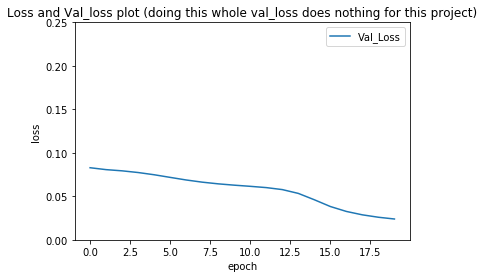

In [25]:
print(fitted_history.history.keys())

plt.plot(fitted_history.history['loss'])
#plt.plot(fitted_history.history['val_loss'])
plt.ylim(0,.25)
plt.title('Loss and Val_loss plot (doing this whole val_loss does nothing for this project)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Val_Loss', 'Loss'])

In [30]:
# predictions
encoded_train = encoder.predict(x_train)
decoded_train = decoder.predict(encoded_train)

In [37]:
print('Encoded shape: ', encoded_train.shape)
encoded_train

Encoded shape:  (10721, 3)


array([[ 0.        ,  1.33457804,  0.        ],
       [ 0.        ,  1.58578205,  0.        ],
       [ 0.        ,  0.21957338,  0.        ],
       ..., 
       [ 0.        ,  2.64420772,  2.35035133],
       [ 0.        ,  2.93182325,  2.86340189],
       [ 0.        ,  3.21503997,  2.88821411]], dtype=float32)

In [39]:
print('Decoded shape: ', decoded_train.shape)

decoded_train

Decoded shape:  (10721, 6)


array([[ 0.61129248,  0.64068788,  0.29205966,  0.67006189,  0.69886672,
         0.30492994],
       [ 0.64508837,  0.69957143,  0.29259199,  0.72487271,  0.7603603 ,
         0.31157023],
       [ 0.47036543,  0.38339505,  0.28996396,  0.42092916,  0.40310389,
         0.27951828],
       ..., 
       [ 0.60919708,  0.73666322,  0.74667937,  0.69590068,  0.75378275,
         0.75648952],
       [ 0.60740298,  0.75423908,  0.82198638,  0.69955724,  0.7631833 ,
         0.82910341],
       [ 0.64116412,  0.80213416,  0.83012146,  0.75172657,  0.81599718,
         0.84079194]], dtype=float32)

# Using the MNIST Data Set 

In [4]:
# # sanity check to make sure it works

# from keras.datasets import mnist
# import numpy as np
# (x_train, _), (x_test, _) = mnist.load_data()

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print(x_train.shape)
# print(x_test.shape)

11468800/11490434 [============================>.] - ETA: 0s(60000, 784)
(10000, 784)


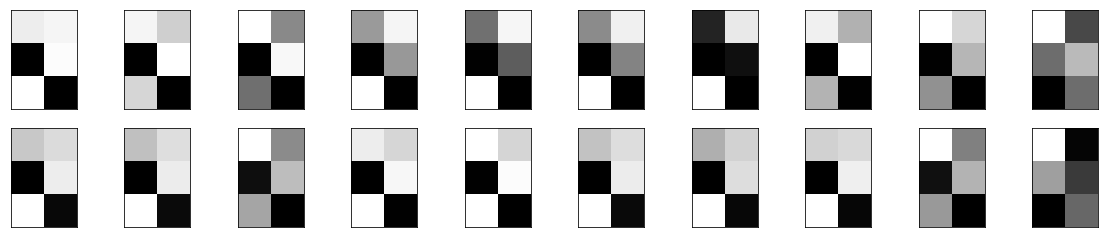

In [40]:
# sanity check when using the pictures dataset
# Visualizations of the coded representations.

import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(3, 2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(3, 2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()